In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from typing import List
from string import ascii_lowercase
from hacc import Crypt
import random

In [4]:
key = "password"
secret = "humor is mankinds greatest blessing"

In [3]:
crypt = Crypt(key=key, secret=secret, access=True)

In [4]:
def str_times(test_password: str, crypt: Crypt, n: int, stdev_filter: int = None) -> np.array:
    times = list()
    for _ in range(n):
        start = time.perf_counter()
        crypt.unlock(test_password)
        end = time.perf_counter()
        times.append(end-start)
    times = np.array(times)
    if stdev_filter is None:
        return times
    else:
        return times[times <= times.mean() + (times.std()*stdev_filter)]

def str_mean_time(test_password: str, crypt: Crypt, n: int, stdev_filter: int = None) -> float:
    times = str_times(test_password, crypt, n, stdev_filter)
    return times.mean()

In [5]:
# * there is a difference between the execution time given correct/incorrect chars
n = 1000
std = 1
t_wrong = str_times("a", crypt, n, std)
t_right = str_times("p", crypt, n, std)

In [6]:
tm_wrong = str_mean_time("a", crypt, 10000)
tm_right = str_mean_time("p", crypt, 10000)

In [10]:
tm_wrong, tm_right

(6.290646590059623e-07, 6.116131175076589e-07)

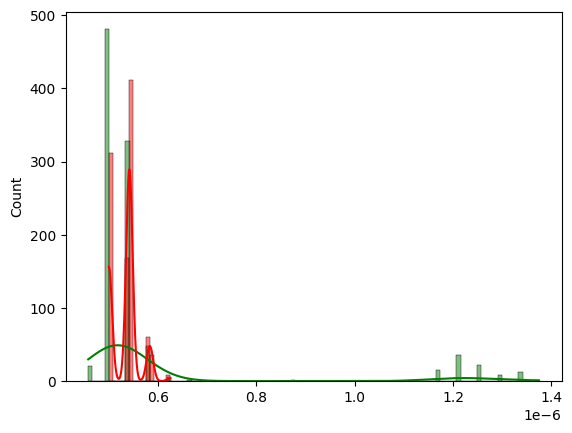

In [9]:

sns.histplot(data = t_right, kde = True, color="green")
sns.histplot(data = t_wrong, kde = True, color="red")
# sns.histplot(data = t_right, kde = True)
plt.show()

In [80]:
t_wrong = pd.Series(t_wrong)

In [81]:
ser = t_wrong.rolling(30).mean()

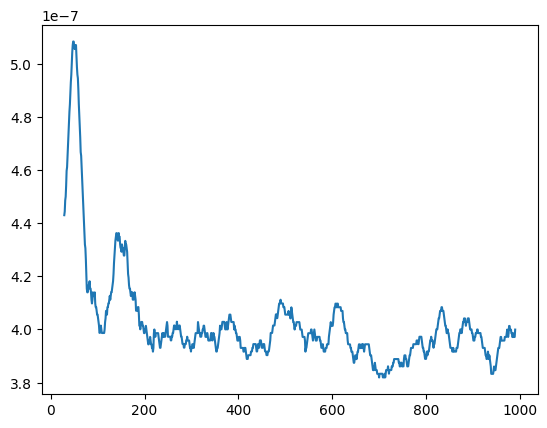

In [82]:
plt.plot(ser)

In [9]:
crypt.unlock("passwor")

False

In [95]:
def key_time_dist(potential_keys: List[str], crypt: Crypt, n: int = 10_000, excess=10) -> pd.Series:
    pktd = {pk:list() for pk in potential_keys}
    for i in range(n+excess):
        for pk in potential_keys:
            start = time.perf_counter()
            crypt.unlock(pk)
            end = time.perf_counter()
            pktd[pk].append(end-start)
    return {pk:times[excess:] for pk, times in pktd.items()}

    
def key_mean_time_dist(pktd, stdev_filter = None):
    for k, v in pktd.items():
        pktd[k] = np.array(v)
    if stdev_filter is None:
        return pd.Series({k:v.mean() for k, v in pktd.items()})
    else:
        for k, v in pktd.items():
            pktd[k] = v[v <= v.mean() + (v.std()*stdev_filter)].mean()
        return pd.Series(pktd)

def sere_key_time_dist(potential_keys: List[str], crypt: Crypt, n: int = 10_000, mn = 10, excess=10) -> pd.Series:
    df = pd.DataFrame(index=potential_keys)
    for i in range(mn):
        df[i] = key_mean_time_dist(key_time_dist(potential_keys, crypt, n, excess), 1)
    return df

def gen_chars(solved):
    return [f"{solved}{c}" for c in ascii_lowercase]

In [104]:
crypt = Crypt(key=key, secret=secret, level=16, access=True)

In [97]:
crypt.locked

True

look at the standard deviation of mean execution times. if there is a low standard deviation with one exception, this sample is usable

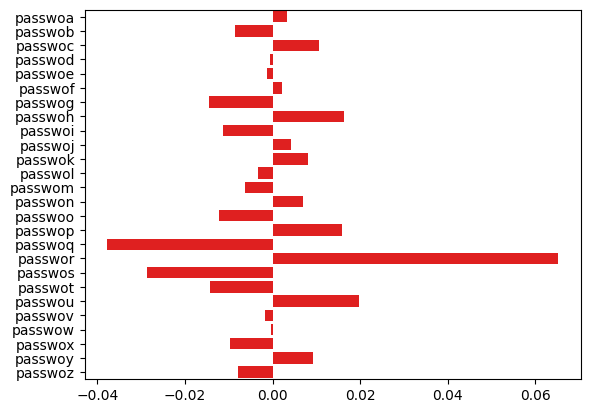

In [85]:
pktd = key_time_dist(gen_chars("passwo"), crypt, 100)
ser = key_mean_time_dist(pktd, None)
# sns.barplot(x=ser.values, y=ser.index, color="red")
# plt.show()
pos_shift = ((ser/ser.shift(1)) - 1)
neg_shift = ((ser/ser.shift(-1)) - 1)
norm_ser = pd.DataFrame({"pos": pos_shift, "neg": neg_shift}, index=ser.index).mean(axis=1)
sns.barplot(x=norm_ser.values, y=norm_ser.index, color="red")
plt.show()

In [120]:
df = sere_key_time_dist(gen_chars("passwor"), crypt, 10, 10)
# ser = key_mean_time_dist(pktd, None)
# # sns.barplot(x=ser.values, y=ser.index, color="red")
# # plt.show()
# pos_shift = ((ser/ser.shift(1)) - 1)
# neg_shift = ((ser/ser.shift(-1)) - 1)
# norm_ser = pd.DataFrame({"pos": pos_shift, "neg": neg_shift}, index=ser.index).mean(axis=1)
# sns.barplot(x=norm_ser.values, y=norm_ser.index, color="red")
# plt.show()

<AxesSubplot: >

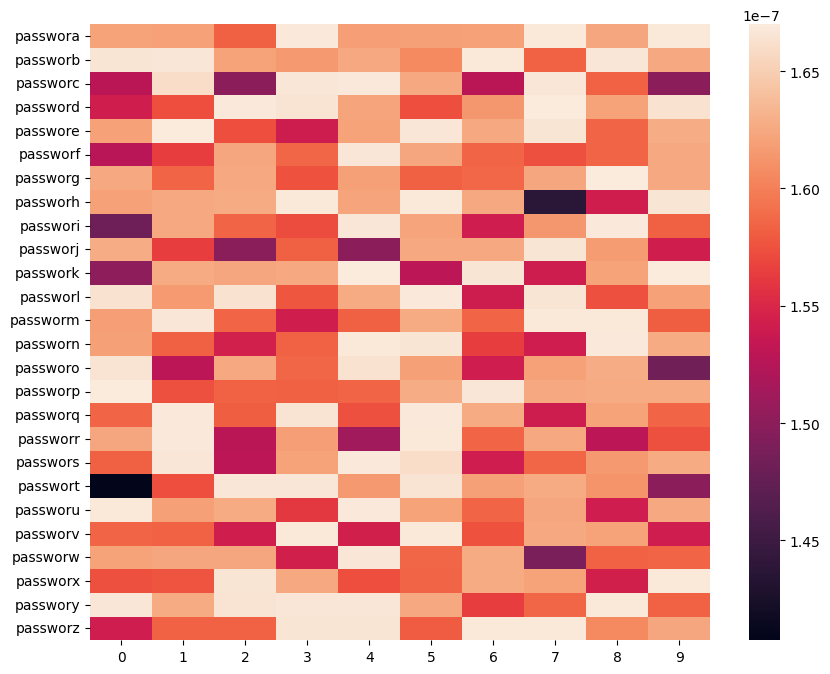

In [121]:
plt.figure(figsize=(10,8))
sns.heatmap(df)

In [122]:
crypt.locked

False

In [ ]:
crypt = Crypt(key=key, secret=secret, level=16, access=True)